## Examen Final de Inteligencia Artificial 

Esta es la segunda parte del examen parcial de Inteligencia Artificial que abarca aspectos prácticos del curso.

* Tienes 180 minutos como máximo para responder tantas preguntas como sea posible. No se ́admiten examenes fuera de tiempo. ́

* Escribe en este cuaderno todas tus respuestas. No se admiten otros tipos de archivos.

* No se admiten copias. Cualquier evidencia de copia de otra fuente no serán consideradas y el puntaje será cero. Si la copia implica varias preguntas (por lo menos dos) se anulará el examen con OA. 

* Responder las preguntas en orden y coloca comentarios a tu código. Si vas a utilizar código desde otras fuentes indicarlo en los comentarios, pero asegurate de modificarlo o reutilizarlo.

* **Solo se puntua si se han respondido todos las ítem de las preguntas, no se tomará en cuenta las preguntas incompletas**.


#### Nombre y Apellidos:  Cristhian Wiki Sánchez Sauñe

1. En lugar de implementar algoritmos desde cero, podemos hacer uso de implementaciones en bibliotecas y paquetes de Python. Por ejemplo, podemos entrenar el algoritmo PPO (Proximal Policy Optimization Algorithms 2017), que viene con el paquete **RLlib**. RLlib es parte de la biblioteca **Ray** y  PPO es un método de política de gradiente que introduce una función de objetivo sustituto (surrogate) que se puede optimizar con el descenso de gradiente. 

  Revisa la documentación y realiza la implementación de PPO. 

In [ ]:
!pip install ray[rllib]
!pip install gym

In [2]:
# me basé en código de https://medium.com/distributed-computing-with-ray/intro-to-rllib-example-environments-3a113f532c70

import ray
import ray.rllib.agents.ppo as ppo
import pandas as pd
import json
import os
import shutil
import sys

Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
os.getenv("HOME")

'/root'

In [4]:
checkpoint_root = "tmp/ppo/cart"

# ruta donde guardaremos nuestros checkpoints
shutil.rmtree(checkpoint_root, ignore_errors=True, onerror=None)

# podemos usar opcionalmente tensorboard para visualizar nuestras métricas
ray_results = f'{os.getenv("HOME")}/ray_results/'
shutil.rmtree(ray_results, ignore_errors=True, onerror=None)

In [5]:
info = ray.init(ignore_reinit_error=True)

2021-02-22 20:30:51,660	INFO services.py:1174 -- View the Ray dashboard at http://127.0.0.1:8265


In [7]:
SELECT_ENV = "CartPole-v1"                      # cargamos el entorno gym 
N_ITER = 10                                     # número de iteraciones por defecto

config = ppo.DEFAULT_CONFIG.copy()              
config["log_level"] = "WARN"                    

# Otros ajustes
config["num_workers"] = 1                       
config["num_sgd_iter"] = 10                     
                                                
config["sgd_minibatch_size"] = 250              
config["model"]["fcnet_hiddens"] = [100, 50]    
config["num_cpus_per_worker"] = 0 

In [10]:
# Ahora entrenamos un agente PPO en el entorno de Cart-pole

agent = ppo.PPOTrainer(config, env=SELECT_ENV)

results = []
episode_data = []
episode_json = []

for n in range(N_ITER):
    result = agent.train()
    results.append(result)
    
    episode = {'n': n, 
               'episode_reward_min': result['episode_reward_min'], 
               'episode_reward_mean': result['episode_reward_mean'], 
               'episode_reward_max': result['episode_reward_max'],  
               'episode_len_mean': result['episode_len_mean']}
    
    episode_data.append(episode)
    episode_json.append(json.dumps(episode))
    file_name = agent.save(checkpoint_root)
    
    print(f'{n:3d}: Min/Mean/Max reward: {result["episode_reward_min"]:8.4f}/{result["episode_reward_mean"]:8.4f}/{result["episode_reward_max"]:8.4f}. Checkpoint saved to {file_name}')

2021-02-22 20:32:52,684	INFO trainer.py:616 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2021-02-22 20:32:52,685	INFO trainer.py:643 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=277) WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/compat/v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=277) Instructions for updating:
(pid=277) non-resource variables are not supported in the long term
(pid=277) 2021-02-22 20:32:56,857	WARNING deprecation.py:34 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in the future!
2021-02-22 20:32:58,073	WARNING deprecation.py:34 -- DeprecationWarning: `framestack` has been deprecated. Use `num_framestacks (int)` instead. This will raise an error in th

Instructions for updating:
Prefer Variable.assign which has equivalent behavior in 2.X.


(pid=277) WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/ray/rllib/policy/tf_policy.py:928: Variable.load (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
(pid=277) Instructions for updating:
(pid=277) Prefer Variable.assign which has equivalent behavior in 2.X.


  0: Min/Mean/Max reward:   9.0000/ 24.6420/102.0000. Checkpoint saved to tmp/ppo/cart/checkpoint_1/checkpoint-1
  1: Min/Mean/Max reward:   8.0000/ 31.2598/ 79.0000. Checkpoint saved to tmp/ppo/cart/checkpoint_2/checkpoint-2
  2: Min/Mean/Max reward:  13.0000/ 41.9100/112.0000. Checkpoint saved to tmp/ppo/cart/checkpoint_3/checkpoint-3
  3: Min/Mean/Max reward:  16.0000/ 52.7400/141.0000. Checkpoint saved to tmp/ppo/cart/checkpoint_4/checkpoint-4
  4: Min/Mean/Max reward:  19.0000/ 71.4700/194.0000. Checkpoint saved to tmp/ppo/cart/checkpoint_5/checkpoint-5
  5: Min/Mean/Max reward:  19.0000/ 92.1300/231.0000. Checkpoint saved to tmp/ppo/cart/checkpoint_6/checkpoint-6
  6: Min/Mean/Max reward:  11.0000/111.6400/285.0000. Checkpoint saved to tmp/ppo/cart/checkpoint_7/checkpoint-7
  7: Min/Mean/Max reward:  11.0000/130.4500/437.0000. Checkpoint saved to tmp/ppo/cart/checkpoint_8/checkpoint-8
  8: Min/Mean/Max reward:  11.0000/158.7100/500.0000. Checkpoint saved to tmp/ppo/cart/checkpoin

In [11]:
# visualizamos algunas métricas
df = pd.DataFrame(data=episode_data)
df

,n,episode_reward_min,episode_reward_mean,episode_reward_max,episode_len_mean
0,0,9.0,24.641975,102.0,24.641975
1,1,8.0,31.259843,79.0,31.259843
2,2,13.0,41.910000,112.0,41.910000
3,3,16.0,52.740000,141.0,52.740000
4,4,19.0,71.470000,194.0,71.470000
5,5,19.0,92.130000,231.0,92.130000
6,6,11.0,111.640000,285.0,111.640000
7,7,11.0,130.450000,437.0,130.450000
8,8,11.0,158.710000,500.0,158.710000
9,9,11.0,182.170000,500.0,182.170000


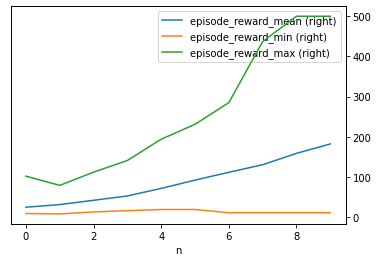

In [12]:
# observamos que la gráfica varía en función de cómo obtenemos la recompensa

df.plot(x="n", y=["episode_reward_mean", "episode_reward_min", "episode_reward_max"], secondary_y=True)

In [13]:
# imprimimos más información del modelo en Tensorflow

import pprint

policy = agent.get_policy()
model = policy.model

# imprimimos las variables
pprint.pprint(model.variables())
pprint.pprint(model.value_function())

# imprimimos la arquitectura del modelo (es una sencilla red densa o fully conected)
print(model.base_model.summary())

[<tf.Variable 'default_policy/fc_1/kernel:0' shape=(4, 100) dtype=float32>,
 <tf.Variable 'default_policy/fc_1/bias:0' shape=(100,) dtype=float32>,
 <tf.Variable 'default_policy/fc_value_1/kernel:0' shape=(4, 100) dtype=float32>,
 <tf.Variable 'default_policy/fc_value_1/bias:0' shape=(100,) dtype=float32>,
 <tf.Variable 'default_policy/fc_2/kernel:0' shape=(100, 50) dtype=float32>,
 <tf.Variable 'default_policy/fc_2/bias:0' shape=(50,) dtype=float32>,
 <tf.Variable 'default_policy/fc_value_2/kernel:0' shape=(100, 50) dtype=float32>,
 <tf.Variable 'default_policy/fc_value_2/bias:0' shape=(50,) dtype=float32>,
 <tf.Variable 'default_policy/fc_out/kernel:0' shape=(50, 2) dtype=float32>,
 <tf.Variable 'default_policy/fc_out/bias:0' shape=(2,) dtype=float32>,
 <tf.Variable 'default_policy/value_out/kernel:0' shape=(50, 1) dtype=float32>,
 <tf.Variable 'default_policy/value_out/bias:0' shape=(1,) dtype=float32>]
<tf.Tensor 'Reshape:0' shape=(?,) dtype=float32>
Model: "model"
________________

In [14]:
# ahora entrenamos el agente para 2000 iteraciones

!rllib rollout tmp/ppo/cart/checkpoint_10/checkpoint-10 \
    --config "{\"env\": \"CartPole-v1\", \"model\": {\"fcnet_hiddens\": [100, 50]}}" \
    --run PPO \
    --no-render \
    --steps 2000

Instructions for updating:
non-resource variables are not supported in the long term
2021-02-22 20:34:07,903	INFO services.py:1174 -- View the Ray dashboard at http://127.0.0.1:8266
2021-02-22 20:34:12,048	INFO trainer.py:616 -- Tip: set framework=tfe or the --eager flag to enable TensorFlow eager execution
2021-02-22 20:34:12,048	INFO trainer.py:643 -- Current log_level is WARN. For more information, set 'log_level': 'INFO' / 'DEBUG' or use the -v and -vv flags.
(pid=462) WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/compat/v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
(pid=462) Instructions for updating:
(pid=462) non-resource variables are not supported in the long term
(pid=463) WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/compat/v2_compat.py:96: disable_resource_variables (from tensorflow.python.ops.variable_scope) 

2. Los datos de series de tiempo capturan una serie de puntos de datos registrados en intervalos (generalmente) regulares. Algunos ejemplos comunes incluyen la temperatura diaria del clima, los precios de las acciones y la cantidad de ventas que realiza una empresa. En los últimos años, los modelos LSTM (Long Short Term Memory Networks) se han convertido en un método muy útil cuando se trata de esos tipos de datos.

    Las redes neuronales recurrentes (las LSTM son un tipo de ellas) son muy buenas para procesar secuencias de datos. Pueden **recordar** patrones en los datos que están muy lejos del pasado (o del futuro). En este ejercicio, se utilizará las LSTM para predecir futuros casos de coronavirus basados en datos del mundo real. 

In [20]:
import torch

import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
from torch import nn, optim

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#93D30C", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 14, 10
register_matplotlib_converters()

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [22]:
df = pd.read_csv('time_series_covid19_confirmed_global.csv')
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384,55402,55420,55445,55473,55492,55514,55518
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,62378,63033,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336,86289,87528,88671,89776,90835,91987,93075,93850,94651
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,101657,101913,102144,102369,102641,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088,109313,109559,109782,110049,110303,110513,110711,110894,111069
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8489,8586,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251,10275,10312,10352,10391,10427,10463,10503,10538,10555
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18066,18156,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086,20112,20163,20210,20261,20294,20329,20366,20381,20389


In [23]:
df = df.iloc[:, 4:]

In [24]:
df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,53332,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384,55402,55420,55445,55473,55492,55514,55518
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,62378,63033,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336,86289,87528,88671,89776,90835,91987,93075,93850,94651
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,101657,101913,102144,102369,102641,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088,109313,109559,109782,110049,110303,110513,110711,110894,111069
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8489,8586,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251,10275,10312,10352,10391,10427,10463,10503,10538,10555
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18066,18156,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086,20112,20163,20210,20261,20294,20329,20366,20381,20389


Mostramos cuantos valores pérdidos tenemos.

In [25]:
df.isnull().sum().sum()

0

 Sumamos todas las filas para obtener los casos diarios acumulados y dibuja los datos acumulados.


In [26]:
daily_cases = df.sum(axis=0)
daily_cases.index = pd.to_datetime(daily_cases.index)
daily_cases.head()

2020-01-22     557
2020-01-23     655
2020-01-24     941
2020-01-25    1433
2020-01-26    2118
dtype: int64

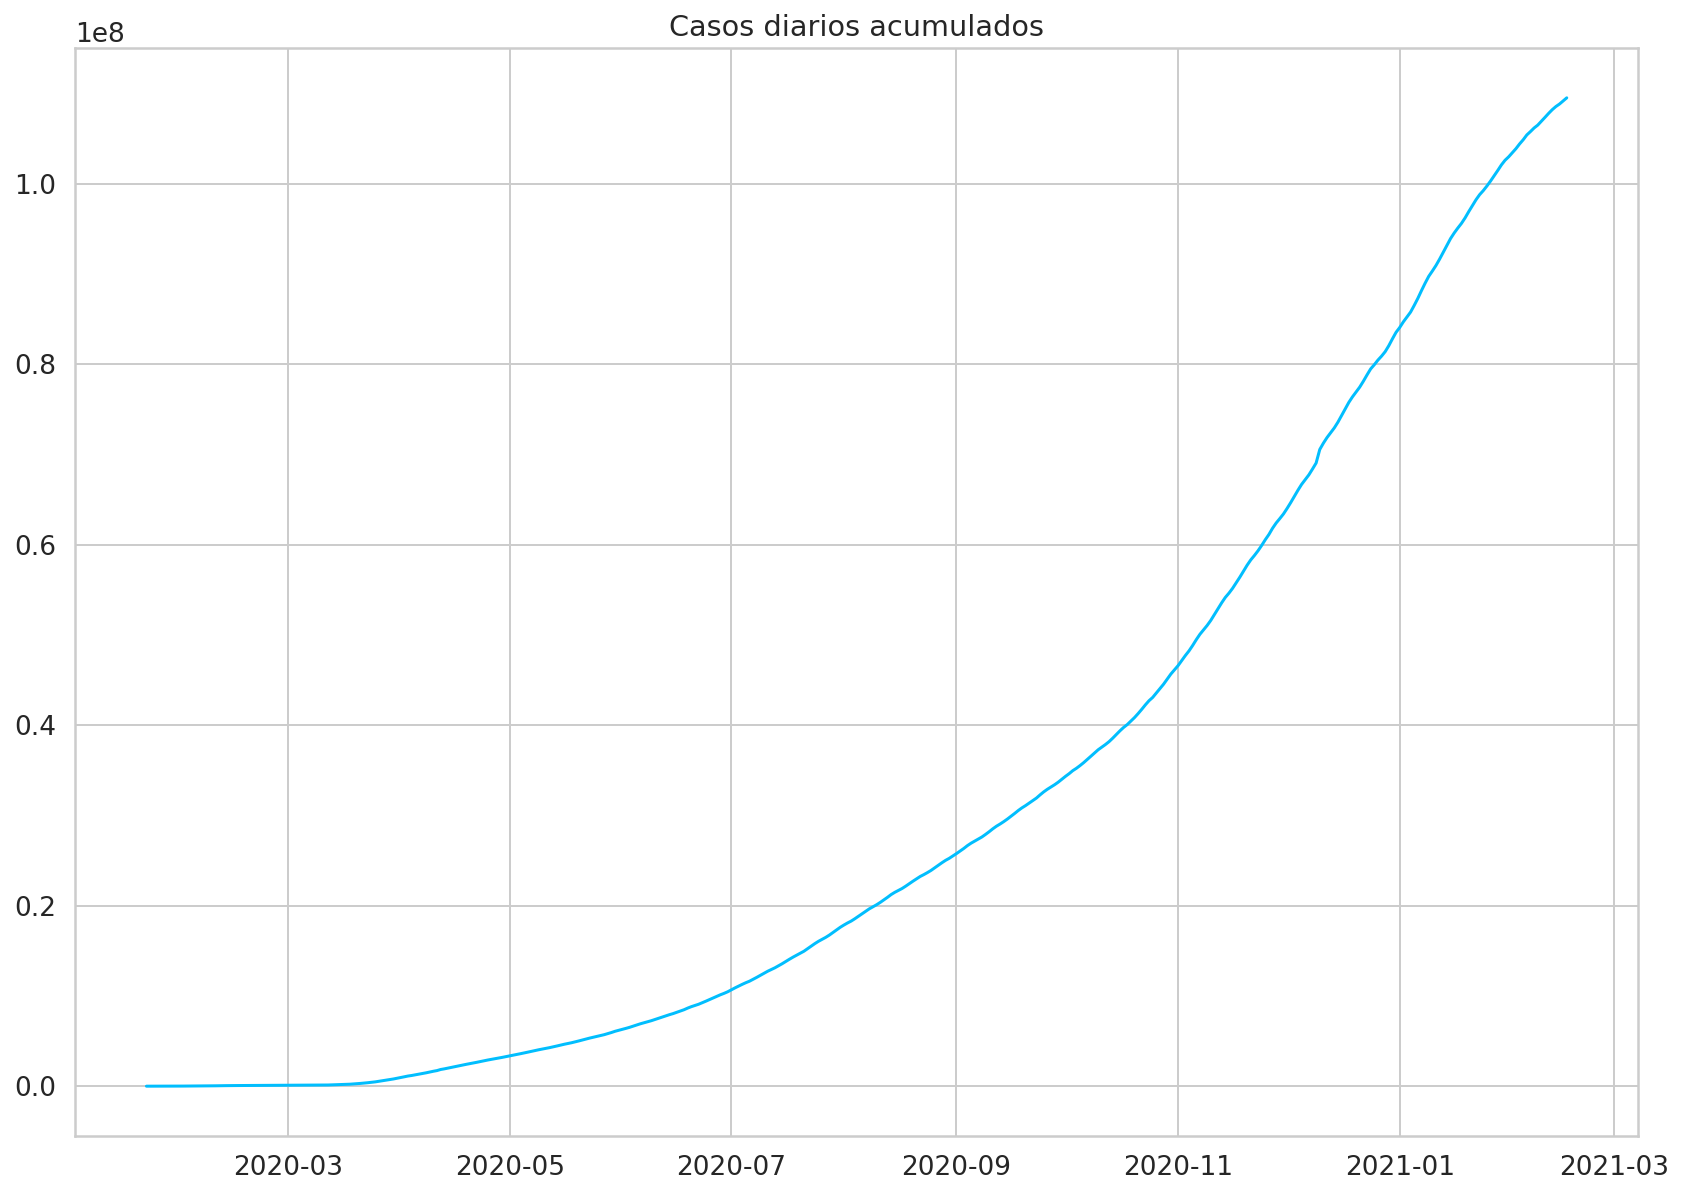

In [27]:
plt.plot(daily_cases)
plt.title("Casos diarios acumulados");

Deshacemos la acumulación restando el valor actual del anterior. Conservaremos el primer valor de la secuencia y dibujamos los casos diarios.

In [28]:
daily_cases = daily_cases.diff().fillna(daily_cases[0]).astype(np.int64)
daily_cases.head()

2020-01-22    557
2020-01-23     98
2020-01-24    286
2020-01-25    492
2020-01-26    685
dtype: int64

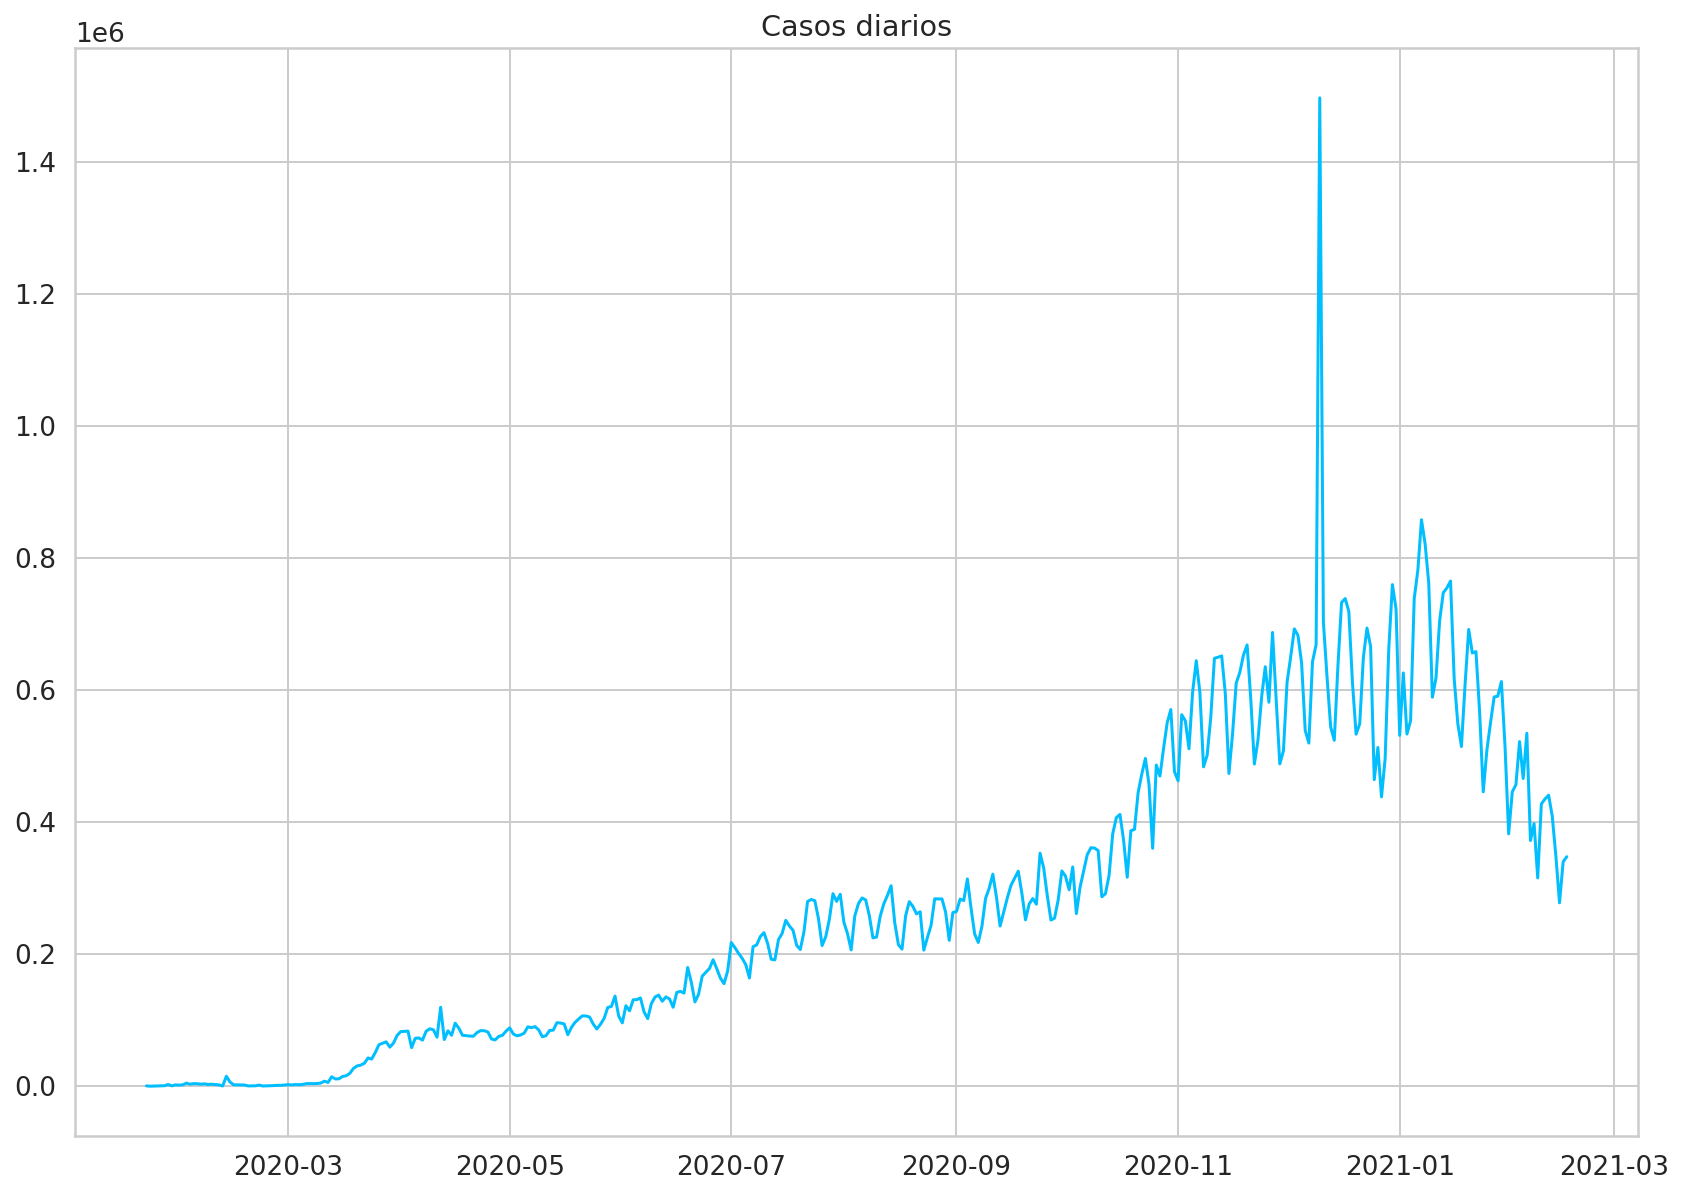

In [29]:
plt.plot(daily_cases)
plt.title("Casos diarios");

Comprobamos la cantidad de datos que tenemos: 

In [30]:
daily_cases.shape

(392,)

### Preprocesamiento

In [31]:
test_data_size = 54

train_data = daily_cases[:-test_data_size]
test_data = daily_cases[-test_data_size:]

train_data.shape

(338,)

Tenemos que escalar los datos (los valores estarán entre 0 y 1) si queremos aumentar la velocidad de entrenamiento y el rendimiento del modelo. Usaremos `MinMaxScaler` de scikit-learn: 

In [36]:
scaler = MinMaxScaler()
scaler = scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

Actualmente, tenemos una gran secuencia de casos diarios. Lo convertiremos en otros más pequeños: 

In [37]:
def create_sequences(data, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length-1):
        x = data[i:(i+seq_length)]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)

In [38]:
seq_length = 5
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).float()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).float()

Cada ejemplo de entrenamiento contiene una secuencia de 5 puntos de datos del historial y una etiqueta para el valor real que nuestro modelo necesita predecir. Vamos a ver esto aquí en: 

In [39]:
X_train.shape

torch.Size([332, 5, 1])

In [40]:
y_train.shape

torch.Size([332, 1])

### Construyendo un modelo

Encapsularemos la complejidad de nuestro modelo en una clase que se extiende desde `torch.nn.Module`: 


In [41]:
class CoronaVirusPredictor(nn.Module):
    def __init__(self, n_features, n_hidden, seq_len, n_layers=2):
        super(CoronaVirusPredictor, self).__init__()

        self.n_hidden = n_hidden
        self.seq_len = seq_len
        self.n_layers = n_layers

        self.lstm = nn.LSTM(
            input_size=n_features,
            hidden_size=n_hidden,
            num_layers=n_layers,
            dropout=0.5
        )

        self.linear = nn.Linear(in_features=n_hidden, out_features=1)

    def reset_hidden_state(self):
        self.hidden = (
            torch.zeros(self.n_layers, self.seq_len, self.n_hidden),
            torch.zeros(self.n_layers, self.seq_len, self.n_hidden)
        )

    def forward(self, sequences):
        lstm_out, self.hidden = self.lstm(
            sequences.view(len(sequences), self.seq_len, -1),
            self.hidden
        )
        last_time_step = \
            lstm_out.view(self.seq_len, len(sequences), self.n_hidden)[-1]
        y_pred = self.linear(last_time_step)
        return y_pred

* Explica los tres métodos `CoronaVirusPredictor` en términos precisos.

El método init inicializa los módulos que usaremos para construir nuestra red. La red consta de dos partes principales, auna LSTM que internamente se regulizará con un dropout de 0.5 para evitar el sobreajuste. Esta LSTM irá conectada a una capa densa, que tendrá solo una salida (que en este caso será una predicción, en base a 5 puntos anteriores).

El método reset, resetea los estados ocultos de la LSTM (colocandolas en 0's).

El método forward esatblece el flujo de nuestra red, que recibe los 5 datos de entrada, las pasa por un LSTM y posteriormente se hace un reshape con **view** para que la salida de la LSTM coincida con la dimensión de entrada de la capa densa. La capa densa nos dará la predicción. 

### Entrenamiento

Se construye una función auxiliar para el entrenamiento de nuestro modelo : 

In [42]:
def train_model(
    model, 
    train_data, 
    train_labels, 
    test_data=None, 
    test_labels=None
):
    loss_fn = torch.nn.MSELoss(reduction='sum')

    optimiser = torch.optim.Adam(model.parameters(), lr=1e-3)
    num_epochs = 60

    train_hist = np.zeros(num_epochs)
    test_hist = np.zeros(num_epochs)

    for t in range(num_epochs):
        model.reset_hidden_state()

        y_pred = model(X_train)

        loss = loss_fn(y_pred.float(), y_train)

        if test_data is not None:
            with torch.no_grad():
                y_test_pred = model(X_test)
                test_loss = loss_fn(y_test_pred.float(), y_test)
            test_hist[t] = test_loss.item()

            if t % 10 == 0:
                print(f'Epoca {t} perdida de entrenamiento: {loss.item()} perdida de prueba: {test_loss.item()}')
        elif t % 10 == 0:
            print(f'Epoca {t} perdida de entrenamiento: {loss.item()}')

        train_hist[t] = loss.item()
        optimiser.zero_grad()
        loss.backward()
        optimiser.step()
  
    return model.eval(), train_hist, test_hist

Ten en cuenta que el estado oculto se restablece al comienzo de cada época. No usamos lotes de datos, el modelo ve todos los ejemplos a la vez. Usaremos el error cuadrático medio para medir nuestro error de entrenamiento y prueba. Grabaremos ambos.

Creamos una instancia del modelo y entrenamos: 

In [43]:
model = CoronaVirusPredictor(
    n_features=1, 
    n_hidden=512, 
    seq_len=seq_length, 
    n_layers=2
)
model, train_hist, test_hist = train_model(
    model, 
    X_train, 
    y_train, 
    X_test, 
   y_test
)

Epoca 0 perdida de entrenamiento: 13.307220458984375 perdida de prueba: 6.673605442047119
Epoca 10 perdida de entrenamiento: 6.4201154708862305 perdida de prueba: 3.106581687927246
Epoca 20 perdida de entrenamiento: 6.017461776733398 perdida de prueba: 3.215876579284668
Epoca 30 perdida de entrenamiento: 3.6511528491973877 perdida de prueba: 2.6896305084228516
Epoca 40 perdida de entrenamiento: 4.450263023376465 perdida de prueba: 2.895148754119873
Epoca 50 perdida de entrenamiento: 3.825892210006714 perdida de prueba: 2.588245153427124


Realizamos un gráfico y explica que sucede.

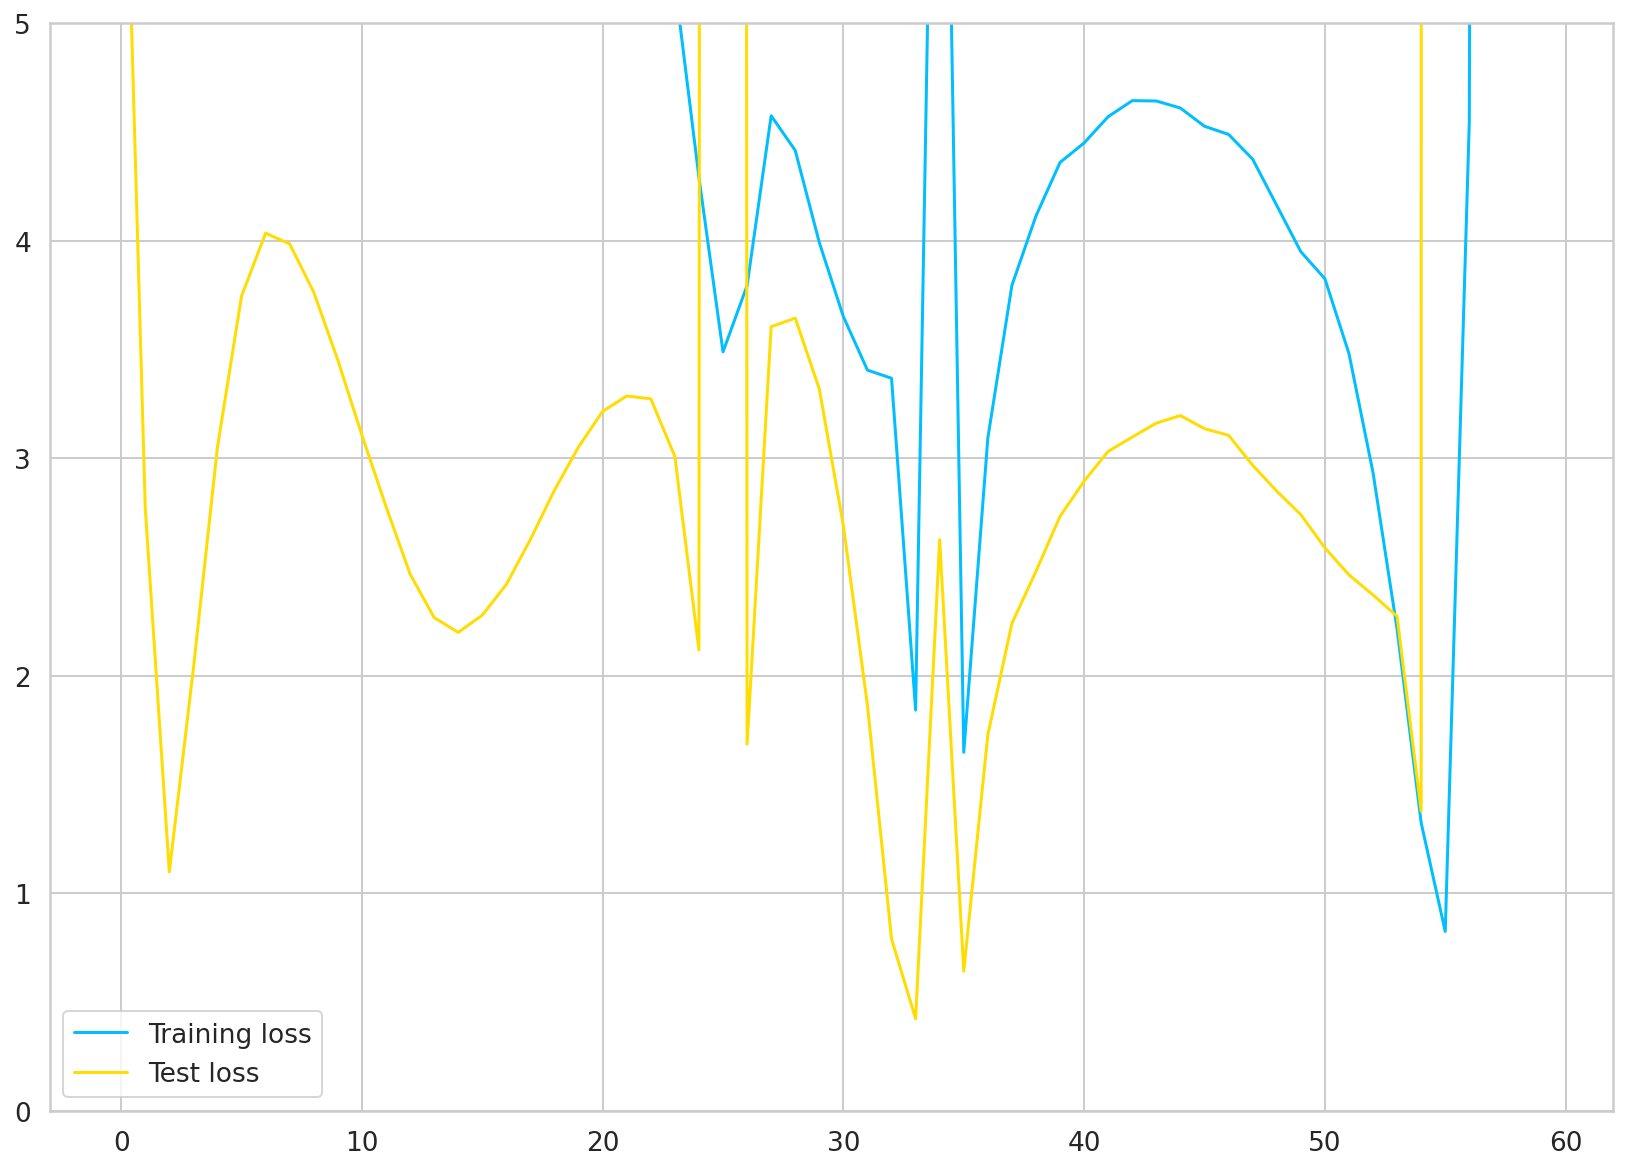

In [44]:
plt.plot(train_hist, label="Training loss")
plt.plot(test_hist, label="Test loss")
plt.ylim((0, 5))
plt.legend();

In [ ]:
## El error en el conjunto de prueba se mantiene relativamente constante, pero el error en el conjunto de
# entrenamiento disminuye conforme aumenta el número de iteraciones. Lo que claro aquí es que ambas gráficas
# empiezan a acercarse una de la otra conforme pasa el tiempo. Nuestro modelo podría estar haciendo bien su 
# trabajo de predicción, pues no se observa señal de sobreajuste.

### Predecir casos diarios

El modelo puede (debido a la forma en que lo hemos entrenado) predecir solo un día en el futuro. Emplearemos una estrategia simple para superar esta limitación. Usamos los valores predichos como entrada para predecir los próximos días: 

In [45]:
with torch.no_grad():
    test_seq = X_test[:1]
    preds = []
    for _ in range(len(X_test)):
        y_test_pred = model(test_seq)
        pred = torch.flatten(y_test_pred).item()
        preds.append(pred)
        new_seq = test_seq.numpy().flatten()
        new_seq = np.append(new_seq, [pred])
        new_seq = new_seq[1:]
        test_seq = torch.as_tensor(new_seq).view(1, seq_length, 1).float()

Invertimos la escala de los datos de prueba y las predicciones del modelo: 

In [46]:
true_cases = scaler.inverse_transform(
    np.expand_dims(y_test.flatten().numpy(), axis=0)
).flatten()

predicted_cases = scaler.inverse_transform(
  np.expand_dims(preds, axis=0)
).flatten()

Visualizamos los resultados y explica los resultados

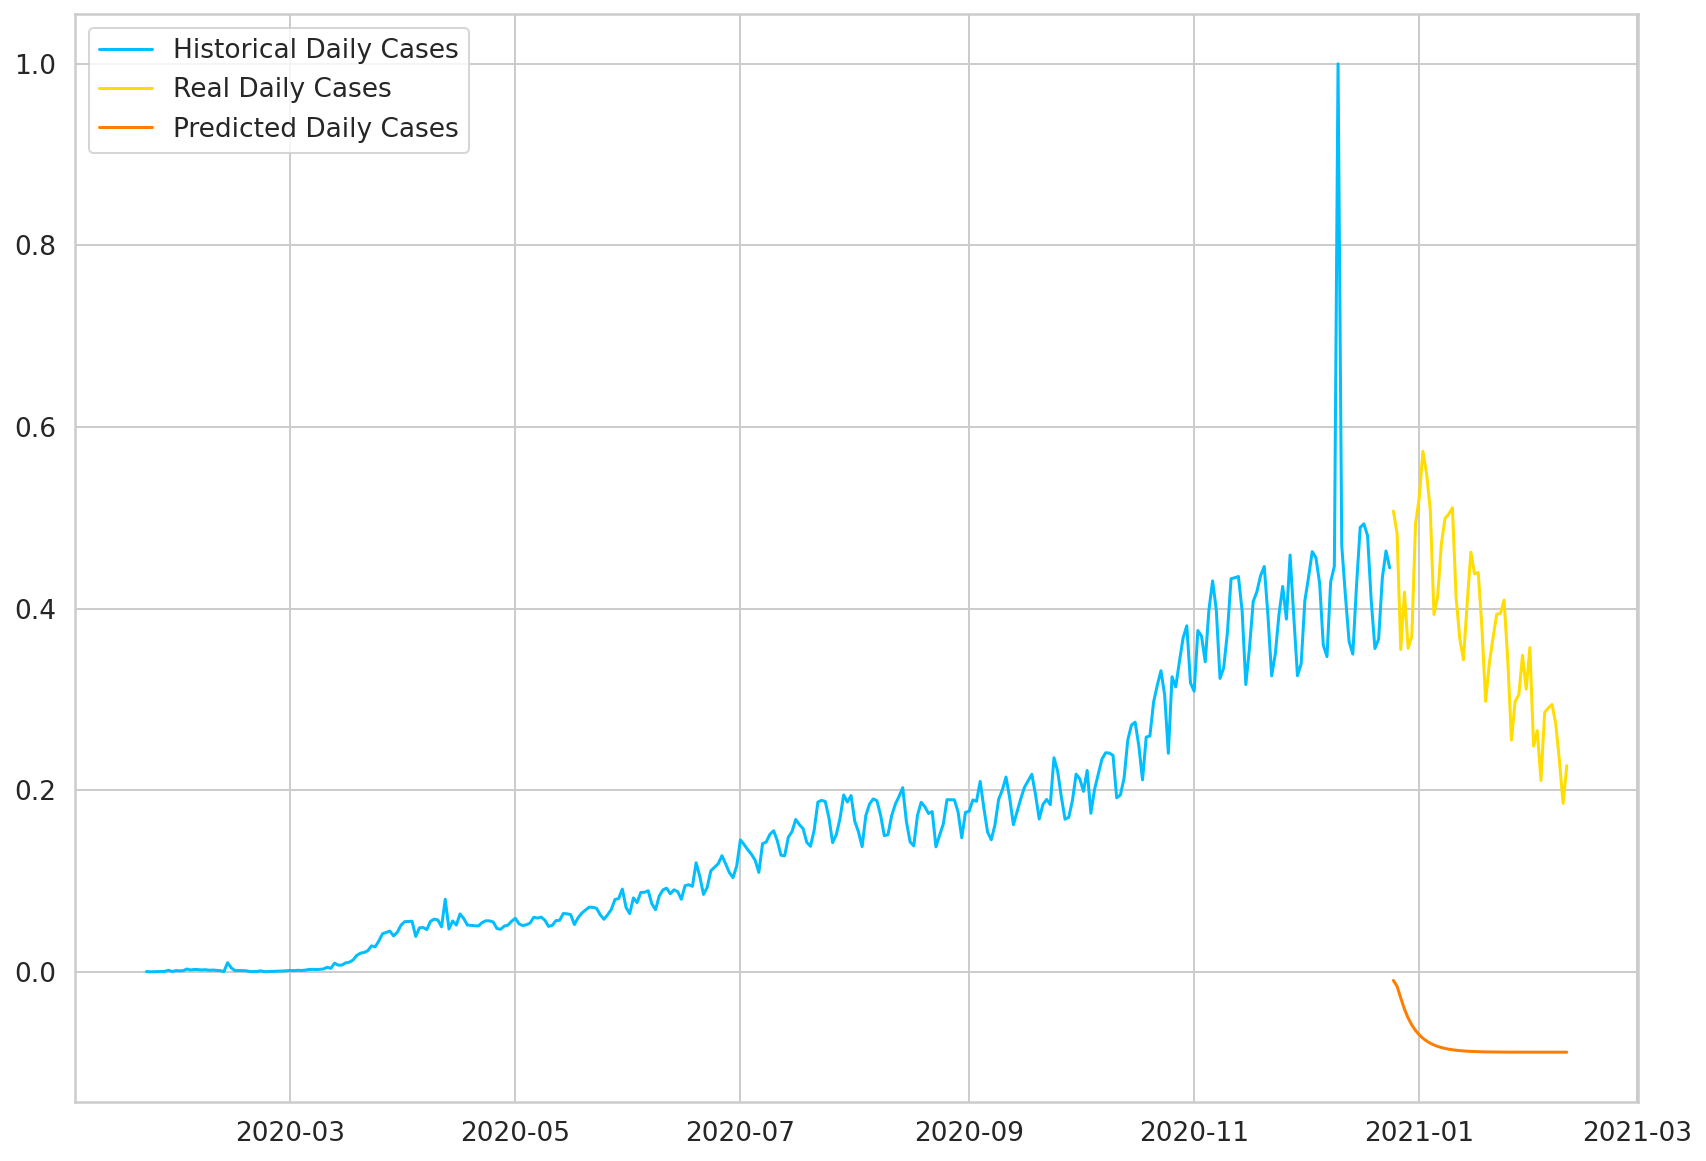

In [48]:
plt.plot(
  daily_cases.index[:len(train_data)], 
  scaler.inverse_transform(train_data).flatten(),
  label='Historical Daily Cases'
)

plt.plot(
  daily_cases.index[len(train_data):len(train_data) + len(true_cases)], 
  true_cases,
  label='Real Daily Cases'
)

plt.plot(
  daily_cases.index[len(train_data):len(train_data) + len(true_cases)], 
  predicted_cases, 
  label='Predicted Daily Cases'
)

plt.legend();

In [75]:
predicted_cases

(array([-0.00945166, -0.01597669, -0.02886813, -0.04105652, -0.05089393,
        -0.05857939, -0.06460668, -0.06937648, -0.07317445, -0.07620866,
        -0.07863712, -0.08058299, -0.08214347, -0.08339564, -0.08440086,
        -0.0852081 , -0.0858565 , -0.08637741, -0.08679596, -0.08713228,
        -0.08740255, -0.08761977, -0.08779434, -0.08793465, -0.08804743,
        -0.08813807, -0.08821093, -0.08826948, -0.08831656, -0.08835439,
        -0.08838481, -0.08840925, -0.0884289 , -0.08844469, -0.08845739,
        -0.0884676 , -0.08847579, -0.08848239, -0.08848769, -0.08849195,
        -0.08849538, -0.08849813, -0.08850035, -0.08850212, -0.08850355,
        -0.0885047 , -0.08850563, -0.08850636]),)

In [ ]:
## Las predicciones estan resultando negativas, talvez hace falta construir una red
# más compleja para afrontar este problema, o necesitamos limpiar nuestros datos.
# Los resultados aún estan lejos de lo que queremos predecir

* Usa todos los datos para entrenar para entrenar el mismo modelo. Realiza los pasos de preprocesamiento y entrenamiento. Utiliza el modelo **completamente entrenado** para predecir los casos confirmados durante 12 días en el futuro.

* Para crear un gráfico interesante con los casos históricos y pronosticados, amplia el índice de fechas de nuestro data frame.

* Utiliza todos los datos para dibujar los resultados. 

In [ ]:
## Tu código

3. Q-learning es un algoritmo de aprendizaje TD fuera de la política. Ahora resolveremos un MDP con un algoritmo de aprendizaje TD basado en políticas, llamado State-Action-Reward-State-Action (SARSA). Al igual que Q-learning, SARSA se centra en los valores de acción-estado. Actualiza la q-función basándose en la siguiente ecuación:

 $Q(s,a) = Q(s,a)  + \alpha(r + \gamma Q(s', a') -Q(s,a))$

    Aquí, $s'$ es el estado resultante después de realizar la acción $a$ en el estado $s$, $r$ es la recompensa asociada, $\alpha$ es la tasa de aprendizaje, y $\gamma$ es el factor de descuento. 

    En Q-learning, se utiliza una política de comportamiento greedy, para actualizar el q-valor. En SARSA, simplemente retomamos la siguiente acción $a'$, siguiendo también una política épsilon-greedy para actualizar el q-valor  y la acción $a'$ se toma en el siguiente paso. 

    Por lo tanto, SARSA es un algoritmo de política.

In [49]:
import torch
import gym

env = gym.make('Taxi-v3')

def gen_politica_epsilon_greedy(n_accion, epsilon):
    def funcion_politica(estado, Q):
        probs = torch.ones(n_accion) * epsilon / n_accion
        mejor_accion = torch.argmax(Q[estado]).item()
        probs[mejor_accion] += 1.0 - epsilon
        accion = torch.multinomial(probs, 1).item()
        return accion
    return funcion_politica


from collections import defaultdict

def sarsa(env, gamma, n_episodios, alpha):
    n_accion = env.action_space.n
    Q = defaultdict(lambda: torch.zeros(n_accion))
    for episodio in range(n_episodios):
        estado = env.reset()
        realizado = False
        accion = politica_epsilon_greedy(estado, Q)
        while not realizado:
            prox_estado, recompensa, realizado, info = env.step(accion)
            prox_accion = politica_epsilon_greedy(prox_estado, Q)
  
            td_delta = recompensa + gamma * Q[prox_estado][prox_accion] - Q[estado][accion]
            Q[estado][accion] += alpha * td_delta

            longitud_episodio[episodio] += 1
            recompensa_episodio_total[episodio] += recompensa

            if realizado:
                break
            estado = prox_estado
            accion = prox_accion

    politica = {}
    for estado, acciones in Q.items():
        politica[estado] = torch.argmax(acciones).item()
    return Q, politica

gamma = 1
n_episodios = 500
alpha = 0.4
epsilon = 0.1

politica_epsilon_greedy = gen_politica_epsilon_greedy(env.action_space.n, epsilon)

longitud_episodio = [0] * n_episodios
recompensa_episodio_total = [0] * n_episodios

q_optima, politica_optima = sarsa(env, gamma, n_episodios, alpha)

Realizamos una visualización de los resultados: la duración y la recompensa total de cada episodio a lo largo del tiempo para verificar si el modelo converge y la duración de los episodios a lo largo del tiempo. 

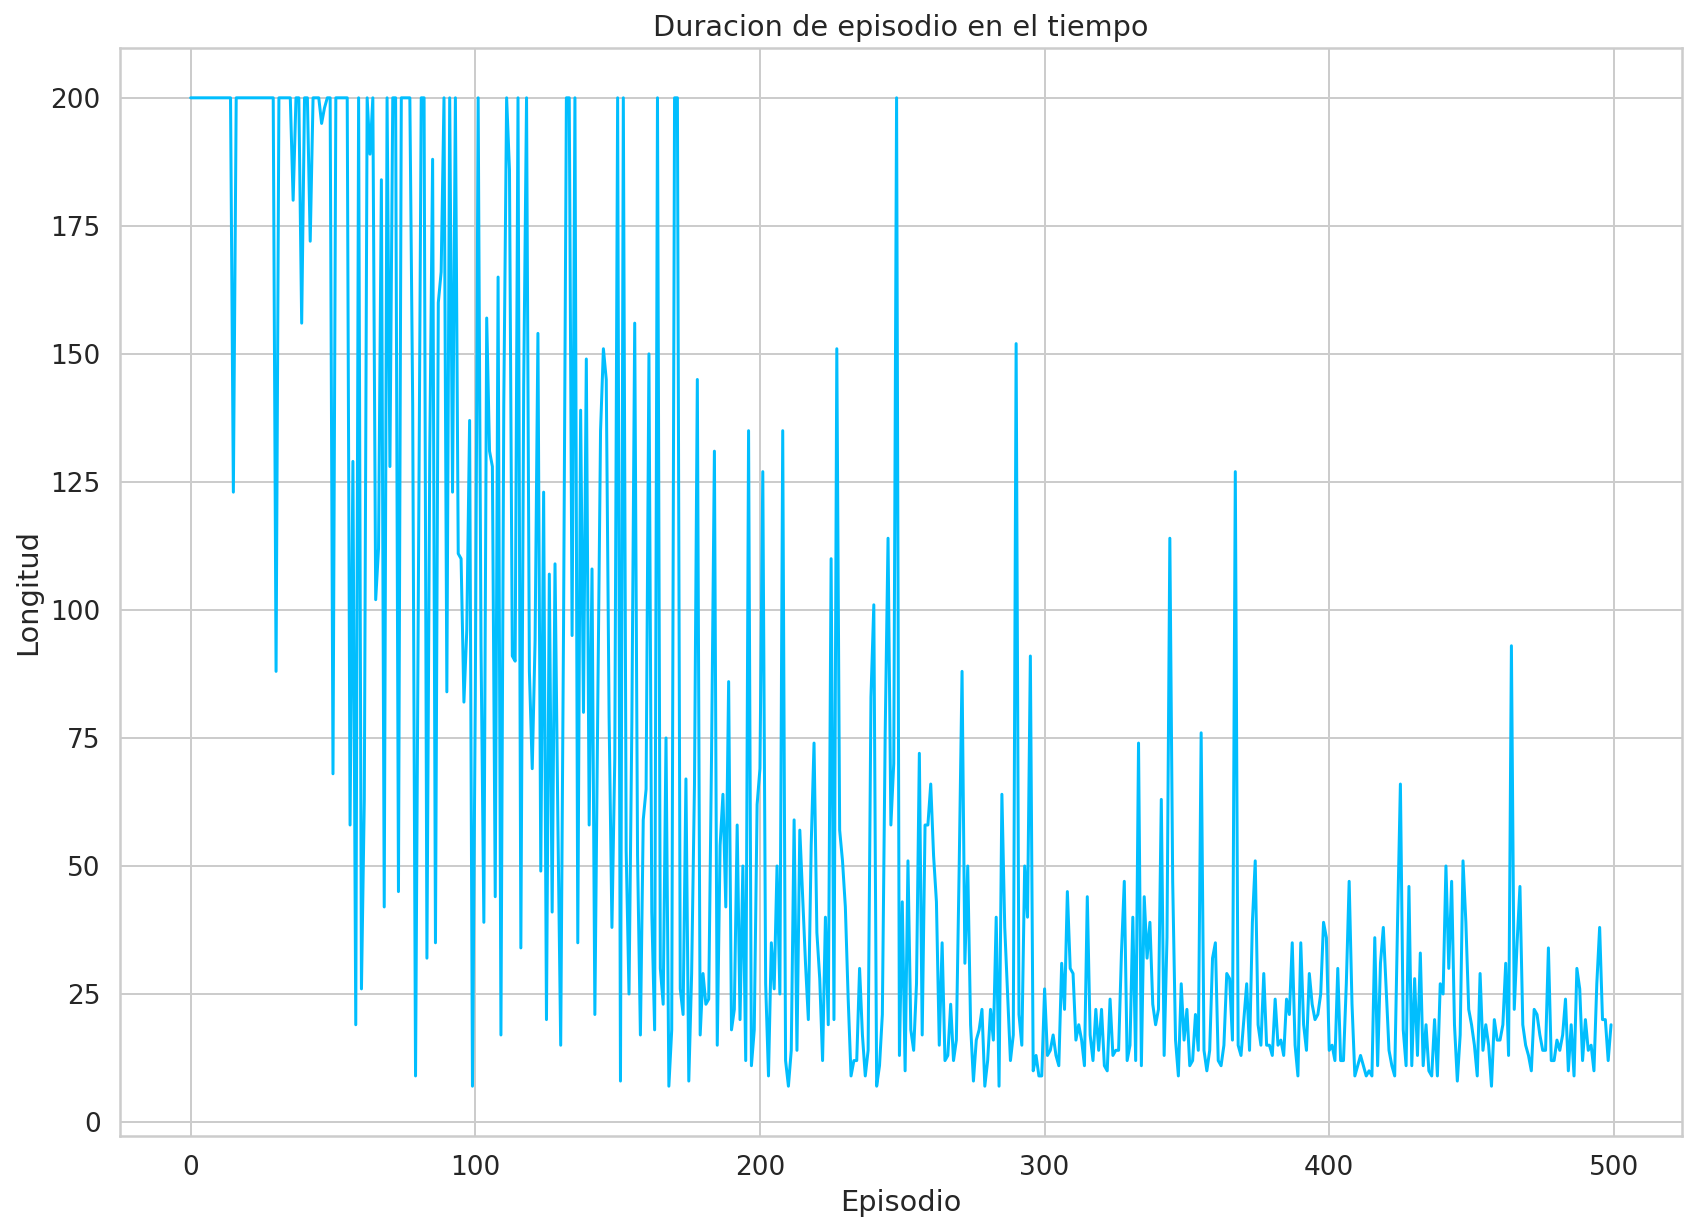

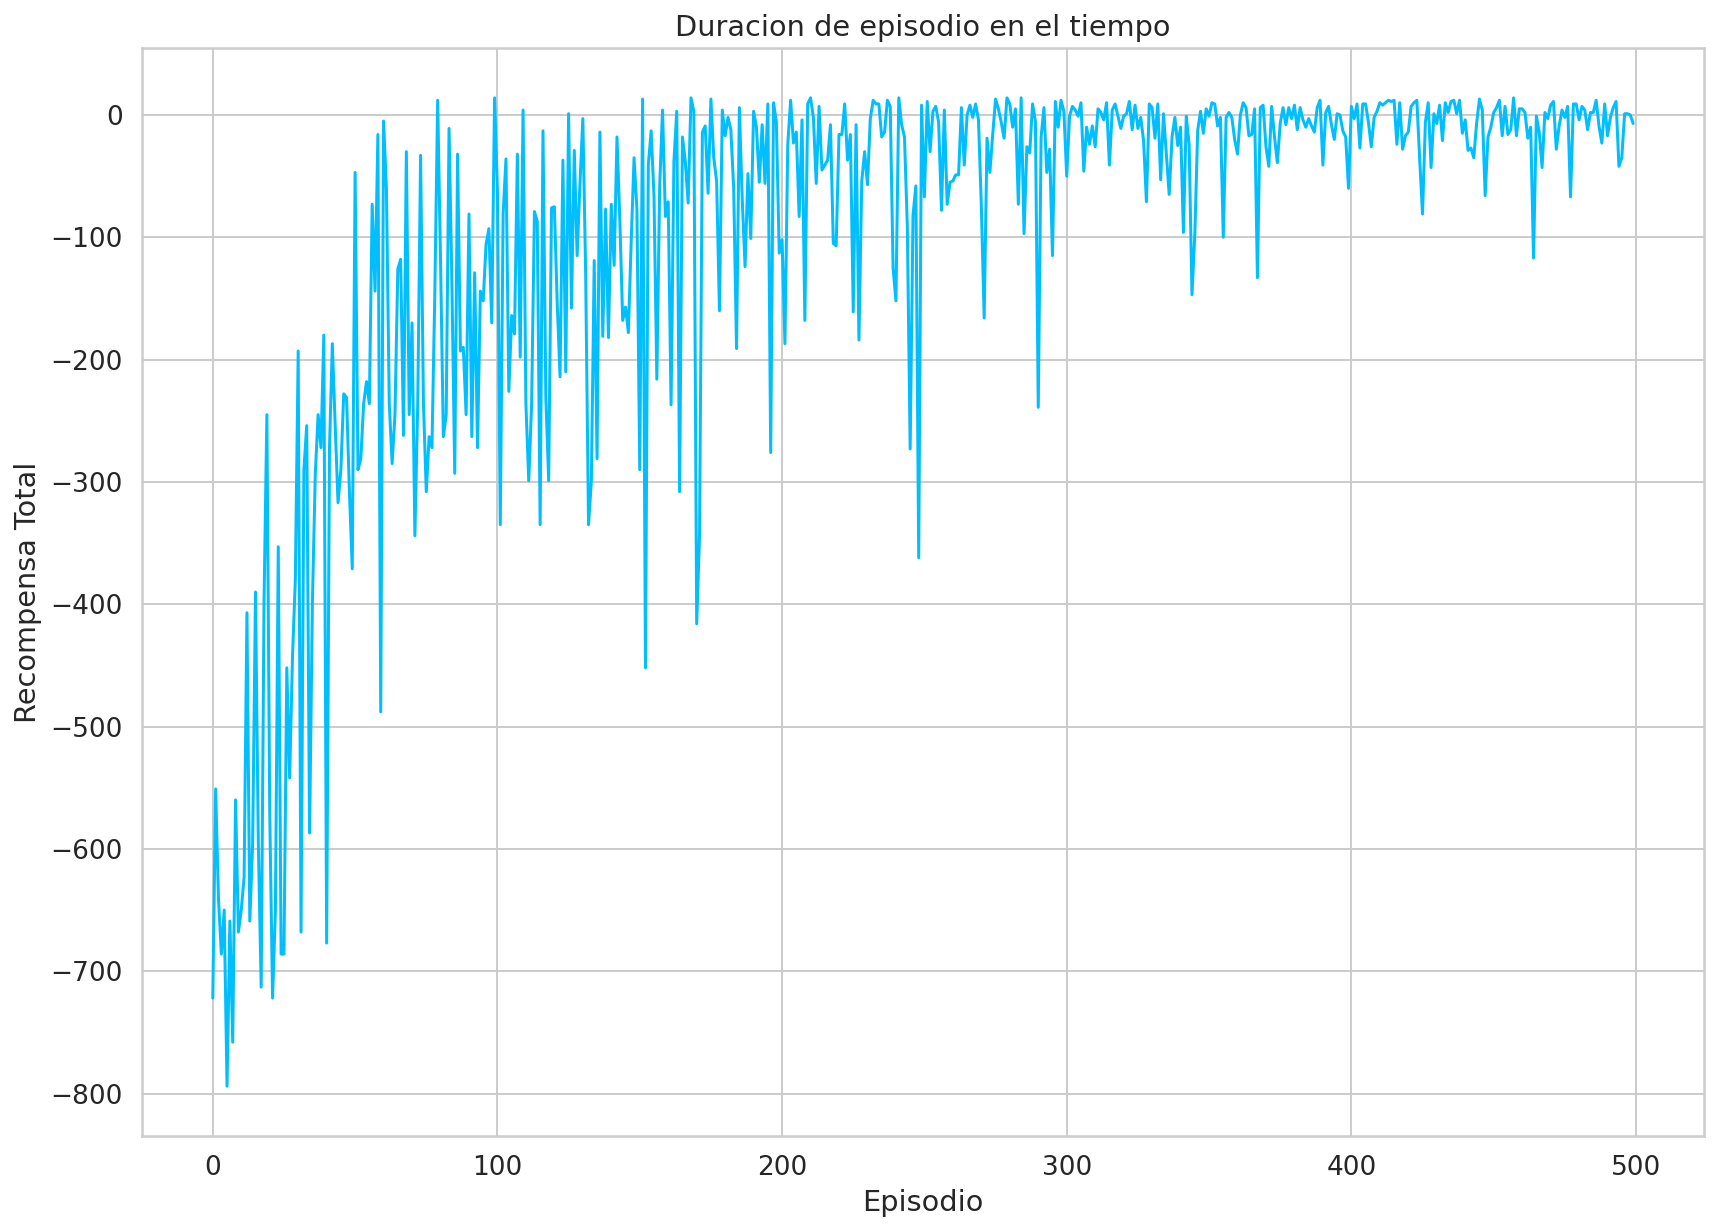

In [50]:
import matplotlib.pyplot as plt
plt.plot(longitud_episodio)
plt.title('Duracion de episodio en el tiempo')
plt.xlabel('Episodio')
plt.ylabel('Longitud')
plt.show()


plt.plot(recompensa_episodio_total)
plt.title('Duracion de episodio en el tiempo')
plt.xlabel('Episodio')
plt.ylabel('Recompensa Total')
plt.show()

Este modelo de SARSA funciona bien, pero no es necesariamente el mejor.  El entorno `Taxi` es un problema de red relativamente complejo con $500$ estados discretos y `6` acciones posibles. El algoritmo SARSA optimiza la q-función  en cada paso de un episodio al aprender y optimizar la política objetivo. 

Obtenemos información sobre el entorno durante el proceso de aprendizaje y usamos esta información para actualizar los valores de inmediato siguiendo la política de épsilon-greedy.

La búsqueda grid es una forma programática de encontrar el mejor conjunto de valores para hiperparámetros en el aprendizaje por refuerzo. El rendimiento de cada conjunto de hiperparámetros se mide mediante las siguientes tres métricas:

* Recompensa total promedio durante los primeros episodios: queremos obtener la mayor recompensa lo antes posible.

* Duración media de los episodios durante los primeros episodios: queremos que el taxi llegue al destino lo más rápido posible.

* Recompensa promedio por cada paso de tiempo en los primeros episodios: queremos obtener la máxima recompensa lo más rápido posible.

In [51]:
opciones_alpha = [0.4, 0.5, 0.6]
opciones_epsilon = [0.1, 0.03, 0.01]
n_episodios = 500

for alpha in opciones_alpha:
    for epsilon in opciones_epsilon:
        longitud_episodio = [0] * n_episodios
        recompensa_episodio_total = [0] * n_episodios
        sarsa(env, gamma, n_episodios, alpha)
        recompensa_por_paso = [recompensa/float(step) for recompensa, step in zip(recompensa_episodio_total, longitud_episodio)]
        print('Alpha: {}, epsilon: {}'.format(alpha, epsilon))
        print('Recompensa promedio por {} episodios: {}'.format(n_episodios, sum(recompensa_episodio_total) / n_episodios))
        print('Duracion promedio de {} los episodios: {}'.format(n_episodios, sum(longitud_episodio) / n_episodios))
        print('Recompensa promedio por paso por {} episodios: {}\n'.format(n_episodios, sum(recompensa_por_paso) / n_episodios))

Alpha: 0.4, epsilon: 0.1
Recompensa promedio por 500 episodios: -118.162
Duracion promedio de 500 los episodios: 78.946
Recompensa promedio por paso por 500 episodios: -0.8238482776339587

Alpha: 0.4, epsilon: 0.03
Recompensa promedio por 500 episodios: -120.084
Duracion promedio de 500 los episodios: 79.716
Recompensa promedio por paso por 500 episodios: -0.79975318621573

Alpha: 0.4, epsilon: 0.01
Recompensa promedio por 500 episodios: -115.594
Duracion promedio de 500 los episodios: 76.324
Recompensa promedio por paso por 500 episodios: -0.7592990882318464

Alpha: 0.5, epsilon: 0.1
Recompensa promedio por 500 episodios: -109.156
Duracion promedio de 500 los episodios: 72.4
Recompensa promedio por paso por 500 episodios: -0.7924844066043175

Alpha: 0.5, epsilon: 0.03
Recompensa promedio por 500 episodios: -109.552
Duracion promedio de 500 los episodios: 73.144
Recompensa promedio por paso por 500 episodios: -0.784683953047241

Alpha: 0.5, epsilon: 0.01
Recompensa promedio por 500 epi

¿Qué crees que sucede aquí?. Modifica los parámetros y explica tus resultados.

In [ ]:
## El valor de la recompensa esat entre -0.74 (Alpha: 0.5, epsilon: 0.01) y 
## -0.94 (Alpha: 0.6, epsilon: 0.03), lo que me sugiere que debo elegir valores
## de epsilon cada vez más pequeños para conseguir una mayor recompensa

In [62]:
opciones_alpha = [0.5]
opciones_epsilon = [0.0001, 0.001, 0.01]
n_episodios = 500

for alpha in opciones_alpha:
    for epsilon in opciones_epsilon:
        longitud_episodio = [0] * n_episodios
        recompensa_episodio_total = [0] * n_episodios
        sarsa(env, gamma, n_episodios, alpha)
        recompensa_por_paso = [recompensa/float(step) for recompensa, step in zip(recompensa_episodio_total, longitud_episodio)]
        print('Alpha: {}, epsilon: {}'.format(alpha, epsilon))
        print('Recompensa promedio por {} episodios: {}'.format(n_episodios, sum(recompensa_episodio_total) / n_episodios))
        print('Duracion promedio de {} los episodios: {}'.format(n_episodios, sum(longitud_episodio) / n_episodios))
        print('Recompensa promedio por paso por {} episodios: {}\n'.format(n_episodios, sum(recompensa_por_paso) / n_episodios))

Alpha: 0.5, epsilon: 0.0001
Recompensa promedio por 500 episodios: -105.346
Duracion promedio de 500 los episodios: 70.906
Recompensa promedio por paso por 500 episodios: -0.6963494402315591

Alpha: 0.5, epsilon: 0.001
Recompensa promedio por 500 episodios: -103.408
Duracion promedio de 500 los episodios: 69.076
Recompensa promedio por paso por 500 episodios: -0.7065408304768444

Alpha: 0.5, epsilon: 0.01
Recompensa promedio por 500 episodios: -109.416
Duracion promedio de 500 los episodios: 72.816
Recompensa promedio por paso por 500 episodios: -0.816089190680817



In [ ]:
## Como lo suponíamos, necesitamos variar el epsilon para  que sea cada vez más pequeño, 
# vemos que para el valor de 0.0001, se obtiene una mayor recompensa para nuestro agente.
# El parámetro Alpha=0.5 parece funcionar bien, y no hay necesidad de cambiarlo

4. En este ejercicios, se pide explicar los algoritmos de aprendizaje de estructuras en pgmpy. 


In [ ]:
!pip install pgmpy

In [54]:
from itertools import combinations

import networkx as nx
from sklearn.metrics import f1_score

from pgmpy.estimators import PC, HillClimbSearch, ExhaustiveSearch
from pgmpy.estimators import K2Score
from pgmpy.utils import get_example_model
from pgmpy.sampling import BayesianModelSampling

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [73]:
model = get_example_model('alarm')
samples = BayesianModelSampling(model).forward_sample(size=int(1e3))
samples.head()




  0%|          | 0/37 [00:00<?, ?it/s]


Generating for node: MINVOLSET:   0%|          | 0/37 [00:00<?, ?it/s]


Generating for node: VENTMACH:   0%|          | 0/37 [00:00<?, ?it/s] /usr/local/lib/python3.6/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:519: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state names as state numbers"



Generating for node: DISCONNECT:   0%|          | 0/37 [00:00<?, ?it/s]


Generating for node: VENTTUBE:   0%|          | 0/37 [00:00<?, ?it/s]  


Generating for node: INTUBATION:   0%|          | 0/37 [00:00<?, ?it/s]


Generating for node: PULMEMBOLUS:   0%|          | 0/37 [00:00<?, ?it/s]


Generating for node: SHUNT:   0%|          | 0/37 [00:00<?, ?it/s]      


Generating for node: PAP:   0%|          | 0/37 [00:00<?, ?it/s]  


Generating for node: FIO2:   0%|          | 0/37 [00:00<?, ?it/s]


Generating for node: KINKEDTU

,MINVOLSET,VENTMACH,DISCONNECT,VENTTUBE,INTUBATION,PULMEMBOLUS,SHUNT,PAP,FIO2,KINKEDTUBE,VENTLUNG,VENTALV,ARTCO2,EXPCO2,PVSAT,SAO2,MINVOL,PRESS,ANAPHYLAXIS,TPR,INSUFFANESTH,CATECHOL,HR,ERRCAUTER,HRSAT,HREKG,ERRLOWOUTPUT,HRBP,LVFAILURE,HISTORY,HYPOVOLEMIA,STROKEVOLUME,CO,BP,LVEDVOLUME,PCWP,CVP
0,NORMAL,NORMAL,FALSE,LOW,NORMAL,FALSE,NORMAL,NORMAL,NORMAL,FALSE,ZERO,ZERO,HIGH,LOW,LOW,LOW,ZERO,NORMAL,FALSE,LOW,FALSE,HIGH,HIGH,FALSE,HIGH,HIGH,FALSE,HIGH,FALSE,FALSE,FALSE,NORMAL,HIGH,LOW,NORMAL,NORMAL,NORMAL
1,NORMAL,ZERO,TRUE,ZERO,NORMAL,FALSE,NORMAL,NORMAL,NORMAL,FALSE,LOW,HIGH,LOW,LOW,HIGH,HIGH,HIGH,HIGH,FALSE,LOW,FALSE,HIGH,HIGH,FALSE,HIGH,HIGH,FALSE,HIGH,FALSE,FALSE,TRUE,NORMAL,HIGH,LOW,HIGH,HIGH,NORMAL
2,NORMAL,NORMAL,FALSE,LOW,NORMAL,FALSE,NORMAL,NORMAL,NORMAL,FALSE,ZERO,ZERO,HIGH,LOW,LOW,LOW,ZERO,HIGH,FALSE,LOW,TRUE,HIGH,HIGH,FALSE,HIGH,HIGH,FALSE,HIGH,FALSE,FALSE,TRUE,LOW,LOW,LOW,HIGH,HIGH,NORMAL
3,NORMAL,NORMAL,FALSE,LOW,NORMAL,FALSE,NORMAL,NORMAL,NORMAL,FALSE,ZERO,ZERO,HIGH,LOW,LOW,LOW,ZERO,LOW,FALSE,HIGH,FALSE,HIGH,HIGH,FALSE,HIGH,HIGH,FALSE,HIGH,FALSE,FALSE,FALSE,NORMAL,HIGH,NORMAL,NORMAL,NORMAL,NORMAL
4,NORMAL,NORMAL,FALSE,LOW,NORMAL,FALSE,NORMAL,LOW,LOW,FALSE,ZERO,ZERO,HIGH,LOW,LOW,LOW,ZERO,HIGH,FALSE,HIGH,FALSE,NORMAL,HIGH,FALSE,HIGH,HIGH,FALSE,HIGH,FALSE,FALSE,TRUE,NORMAL,HIGH,HIGH,HIGH,NORMAL,HIGH


¿ Explica que significa estos resultados?

In [ ]:
## Se muestran datos que serán muestreados por un modelo bayesiano, en total son
# 100 ejemplos que serán usados por los modelos posteriores. Estas muestras tienen características
# aparti de las cuales podemos distinguirlas una de las otras (podriamos clasificarlas
# mediante un árbol o grafo si lo deseariamos con networkx)

Escribimos una función para evaluar las estructuras del modelo aprendidas. 

In [56]:
def get_f1_score(estimated_model, true_model):
    nodes = estimated_model.nodes()
    est_adj = nx.to_numpy_matrix(estimated_model.to_undirected(), nodelist=nodes, weight=None)
    true_adj = nx.to_numpy_matrix(true_model.to_undirected(), nodelist=nodes, weight=None)
    
    f1 = f1_score(np.ravel(true_adj), np.ravel(est_adj))
    print("F1-score para el modelo: ", f1)

Aprendizaje de la estructura del modelo usando PC 

In [65]:
est = PC(data=samples)
estimated_model = est.estimate(variant='stable', max_cond_vars=4)
get_f1_score(estimated_model, model)



  0%|          | 0/4 [00:00<?, ?it/s]

Working for n conditional variables: 0:   0%|          | 0/4 [00:00<?, ?it/s]

Working for n conditional variables: 0:  25%|██▌       | 1/4 [00:02<00:07,  2.36s/it]

Working for n conditional variables: 1:  25%|██▌       | 1/4 [00:02<00:07,  2.36s/it]

Working for n conditional variables: 1:  50%|█████     | 2/4 [00:20<00:14,  7.10s/it]

Working for n conditional variables: 2:  50%|█████     | 2/4 [00:20<00:14,  7.10s/it]

Working for n conditional variables: 2:  75%|███████▌  | 3/4 [00:36<00:09,  9.89s/it]

Working for n conditional variables: 3:  75%|███████▌  | 3/4 [00:36<00:09,  9.89s/it]

Working for n conditional variables: 3: 100%|██████████| 4/4 [00:39<00:00,  7.71s/it]

Working for n conditional variables: 4: 100%|██████████| 4/4 [00:39<00:00,  7.71s/it]/usr/local/lib/python3.6/dist-packages/pgmpy/estimators/PC.py:366: UserWarning: Reached maximum number of allowed conditional variables. Exiting
  warn("Reached maximum number of allowed

F1-score para el modelo:  0.8285714285714285


Revisa la documentación y modifica el código anterior utilizando el parametro `orig` y explica los resultados. 

In [67]:
est = PC(data=samples)
estimated_model = est.estimate(variant='orig', max_cond_vars=4)
get_f1_score(estimated_model, model)



  0%|          | 0/4 [00:00<?, ?it/s]

Working for n conditional variables: 0:   0%|          | 0/4 [00:00<?, ?it/s]

Working for n conditional variables: 0:  25%|██▌       | 1/4 [00:02<00:07,  2.38s/it]

Working for n conditional variables: 1:  25%|██▌       | 1/4 [00:02<00:07,  2.38s/it]

Working for n conditional variables: 1:  50%|█████     | 2/4 [00:14<00:10,  5.27s/it]

Working for n conditional variables: 2:  50%|█████     | 2/4 [00:14<00:10,  5.27s/it]

Working for n conditional variables: 2:  75%|███████▌  | 3/4 [00:27<00:07,  7.50s/it]

Working for n conditional variables: 3:  75%|███████▌  | 3/4 [00:27<00:07,  7.50s/it]

Working for n conditional variables: 3: 100%|██████████| 4/4 [00:29<00:00,  6.09s/it]

Working for n conditional variables: 4: 100%|██████████| 4/4 [00:29<00:00,  6.09s/it]/usr/local/lib/python3.6/dist-packages/pgmpy/estimators/PC.py:366: UserWarning: Reached maximum number of allowed conditional variables. Exiting
  warn("Reached maximum number of allowed

F1-score para el modelo:  0.8484848484848485


In [ ]:
# 'orig' es el algoritmo PC original sin modificaciones. Notamos que que 'orig'
# consigue un mayor escore, por lo que concluimos, que no es necesario usar un 
# modelo complejo con los datos existentes

Aprendizaje de la estructura del modelo usando Hill-Climb Search 

In [68]:
scoring_method = K2Score(data=samples)
est = HillClimbSearch(data=samples)
estimated_model = est.estimate(scoring_method=scoring_method, max_indegree=4, max_iter=int(1e4))
get_f1_score(estimated_model, model)



  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 1/10000 [00:14<40:30:05, 14.58s/it]

  0%|          | 2/10000 [00:15<28:45:38, 10.36s/it]

  0%|          | 3/10000 [00:15<20:34:26,  7.41s/it]

  0%|          | 4/10000 [00:16<14:50:04,  5.34s/it]

  0%|          | 5/10000 [00:16<10:47:34,  3.89s/it]

  0%|          | 6/10000 [00:17<7:58:12,  2.87s/it] 

  0%|          | 7/10000 [00:17<5:59:39,  2.16s/it]

  0%|          | 8/10000 [00:18<4:36:37,  1.66s/it]

  0%|          | 9/10000 [00:18<3:40:04,  1.32s/it]

  0%|          | 10/10000 [00:19<2:59:42,  1.08s/it]

  0%|          | 11/10000 [00:19<2:31:27,  1.10it/s]

  0%|          | 12/10000 [00:20<2:12:18,  1.26it/s]

  0%|          | 13/10000 [00:20<1:56:10,  1.43it/s]

  0%|          | 14/10000 [00:21<1:46:14,  1.57it/s]

  0%|          | 15/10000 [00:21<1:38:45,  1.69it/s]

  0%|          | 16/10000 [00:22<1:39:23,  1.67it/s]

  0%|          | 17/10000 [00:22<1:34:35,  1.76it/s]

  0%|          | 18/10000 [00:23<1:29:12

F1-score para el modelo:  0.7692307692307693


In [ ]:
# Hill-Climb Search consigue un menos score que TC.

Implementa el caso de Exhaustive Search utilizando los códigos anteriores y compara los resultados.

In [74]:
est = ExhaustiveSearch(data=samples)
estimated_model = est.estimate()  # demora mucho >= 10 min
get_f1_score(estimated_model, model)

/usr/local/lib/python3.6/dist-packages/pgmpy/estimators/ExhaustiveSearch.py:95: UserWarning: Generating all DAGs of n nodes likely not feasible for n>6!
  warn("Generating all DAGs of n nodes likely not feasible for n>6!")
/usr/local/lib/python3.6/dist-packages/pgmpy/estimators/ExhaustiveSearch.py:98: UserWarning: Attempting to search through 93746319107175952683864071964918454730461746778024627464635174121600584812748548703282543376385452193806936431137231560052128838065111583392770646215498841416082979442330648067511176282732199184911147558161483085919841893469290827996255650168474543134607110617533756037909735459668069833444196401816994512004002417933496313555598963173697952072590902286596238498989761054870081835578169164103256375296 graphs
  n=2 ** (len(nodes) * (len(nodes) - 1))


KeyboardInterrupt: ignored